## Data Preprocessing

This script is for the extraction of important features. Besides, we ran some basic models, such as KNN, RandomForest, LogisticRegression, to check the data correlation.

In [2]:
import pandas as pd
import numpy as np

Apply LabelEncoder to convert categorical variables to dummy variables

In [3]:

from sklearn.calibration import LabelEncoder

train_df = pd.read_csv("train.csv").drop(["_c39"],axis="columns")

date_list = ['policy_bind_date','incident_date']

for val in date_list:
    train_df[val] = pd.to_datetime(train_df[val], format = '%Y-%m-%d')
train_df['delta_time'] = np.log((train_df['incident_date'] - train_df['policy_bind_date']).dt.days)
display(train_df)

f:\Python3.8.5\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,delta_time
0,187,37,125591,2013-08-08,IN,500/1000,1000,1412.06,5000000,450947,...,?,57700,5770,5770,46160,Nissan,Maxima,2000,0,6.265301
1,243,44,967713,1997-12-25,IL,250/500,500,809.11,0,600208,...,YES,51400,5140,10280,35980,Honda,Civic,1996,0,8.739056
2,24,33,649082,1996-01-19,IL,500/1000,1000,1922.84,0,431277,...,NO,46800,4680,9360,32760,Jeep,Wrangler,2002,0,8.845777
3,215,42,519312,2008-10-28,OH,500/1000,500,1848.81,0,435489,...,YES,68520,11420,5710,51390,Suburu,Legacy,2003,1,7.737180
4,85,30,190588,2001-12-09,OH,100/300,1000,796.35,0,614166,...,YES,58960,5360,10720,42880,Ford,F150,2004,0,8.480737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,199,37,982871,1997-07-27,IN,250/500,500,1262.08,0,474615,...,NO,60170,10940,10940,38290,Nissan,Pathfinder,2011,1,8.759982
696,232,43,751905,2001-05-16,OH,250/500,500,1483.91,8000000,431531,...,?,70600,7060,14120,49420,Volkswagen,Passat,2013,1,8.516193
697,215,37,761189,2002-12-28,IN,100/300,500,1632.93,0,614417,...,YES,57120,9520,4760,42840,Mercedes,C300,2002,0,8.398410
698,270,44,701521,2003-07-05,IL,500/1000,2000,1030.95,0,435985,...,NO,35900,7180,3590,25130,Audi,A3,2007,1,8.350194


In [4]:

train_df_cat = train_df.select_dtypes(exclude=["int64","float64"])
train_df_num = train_df.select_dtypes(include=["int64","float64"])
display(train_df_cat.head())

for column in train_df_cat.columns:
    train_df_cat[column] = LabelEncoder().fit_transform(train_df_cat[column])
unique_df = pd.DataFrame(train_df_cat.nunique()).reset_index()
display(unique_df)
unique_df = unique_df[unique_df[0]<=13]
display(train_df_cat[unique_df["index"]])
train_df = pd.concat([train_df_num,train_df_cat[unique_df["index"]]],axis='columns')
train_df.dropna(how='any',axis=0,inplace=True)

display(train_df.head())

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model
0,2013-08-08,IN,500/1000,FEMALE,Masters,protective-serv,reading,not-in-family,2015-01-16,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,NC,Riverwood,7082 Oak Ridge,?,?,Nissan,Maxima
1,1997-12-25,IL,250/500,MALE,JD,craft-repair,polo,other-relative,2015-01-27,Multi-vehicle Collision,Side Collision,Minor Damage,Other,NC,Springfield,9352 Washington Ave,?,YES,Honda,Civic
2,1996-01-19,IL,500/1000,FEMALE,High School,machine-op-inspct,skydiving,wife,2015-01-24,Single Vehicle Collision,Side Collision,Total Loss,Police,WV,Northbend,5061 Francis Ave,?,NO,Jeep,Wrangler
3,2008-10-28,OH,500/1000,MALE,JD,transport-moving,video-games,own-child,2015-02-06,Multi-vehicle Collision,Front Collision,Major Damage,Fire,WV,Northbend,2457 Washington Ave,YES,YES,Suburu,Legacy
4,2001-12-09,OH,100/300,FEMALE,MD,craft-repair,video-games,own-child,2015-02-20,Multi-vehicle Collision,Rear Collision,Total Loss,Fire,SC,Northbend,2290 4th Ave,YES,YES,Ford,F150


,index,0
0,policy_bind_date,673
1,policy_state,3
2,policy_csl,3
3,insured_sex,2
4,insured_education_level,7
5,insured_occupation,14
6,insured_hobbies,20
7,insured_relationship,6
8,incident_date,60
9,incident_type,4


,policy_state,policy_csl,insured_sex,insured_education_level,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available
0,1,2,0,5,1,2,3,2,0,0,5,0,0
1,0,1,1,3,2,0,3,1,3,0,6,0,2
2,0,2,0,2,5,2,3,2,4,6,3,0,1
3,2,2,1,3,3,0,1,0,1,6,3,2,2
4,2,0,0,4,3,0,2,2,1,4,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,1,1,3,5,2,1,0,0,0,1,0,1
696,2,1,1,1,0,0,2,0,0,1,0,1,0
697,1,0,0,1,1,0,2,1,1,4,5,1,2
698,0,2,0,0,2,0,2,0,0,0,3,0,1


,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,insured_education_level,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available
0,187,37,125591,1000,1412.06,5000000,450947,60100,0,21,...,5,1,2,3,2,0,0,5,0,0
1,243,44,967713,500,809.11,0,600208,33200,0,4,...,3,2,0,3,1,3,0,6,0,2
2,24,33,649082,1000,1922.84,0,431277,0,-45200,0,...,2,5,2,3,2,4,6,3,0,1
3,215,42,519312,500,1848.81,0,435489,0,-49000,20,...,3,3,0,1,0,1,6,3,2,2
4,85,30,190588,1000,796.35,0,614166,72400,-77000,9,...,4,3,0,2,2,1,4,3,2,2


In [5]:
import statsmodels.api as sm
y = train_df["fraud_reported"].tolist()
X = train_df.drop(["fraud_reported"],axis="columns")
X_lm = X
X_lm = sm.add_constant(X_lm)
display(X_lm.shape,y.__len__())
res = sm.Logit(y,X_lm).fit()
display(res.summary())

(699, 33)

699

         Current function value: 0.463385
         Iterations: 35


C:\Users\hinwa\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  699
Model:                          Logit   Df Residuals:                      666
Method:                           MLE   Df Model:                           32
Date:                Tue, 25 Apr 2023   Pseudo R-squ.:                  0.1898
Time:                        17:13:29   Log-Likelihood:                -323.91
converged:                      False   LL-Null:                       -399.79
Covariance Type:            nonrobust   LLR p-value:                 1.673e-17
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.5623     33.437      0.047      0.963     -63.973      67.098
months_as_customer              0.0003      0.002      0.149      0.881      -0.004       0.005
age                            -0.0102      0.029     -0.351      0.725      -0.067       0.047
policy_number                -2.02e-07   3.84e-07     -0.526      0.599   -9.55e-07    5.51e-07
policy_deductable               0.0003      0.000      1.750      0.080   -3.41e-05       0.001
policy_annual_premium       -2.436e-05      0.000     -0.060      0.952      -0.001       0.001
umbrella_limit               3.867e-08   4.21e-08      0.918      0.359   -4.39e-08    1.21e-07
insured_zip                  4.102e-07   1.36e-06      0.302      0.763   -2.25e-06    3.07e-06
capital-gains               -3.338e-06   3.53e-06     -0.945      0.345   -1.03e-05    3.59e-06
capital-loss                -3.154e-06   3.53e-06     -0.894      0.371   -1.01e-05    3.76e-06
incident_hour_of_the_day       -0.0092      0.014     -0.636      0.525      -0.037       0.019
number_of_vehicles_involved    -0.0619      0.240     -0.258      0.797      -0.533       0.409
bodily_injuries                 0.1166      0.121      0.962      0.336      -0.121       0.354
witnesses                       0.1875      0.090      2.075      0.038       0.010       0.365
total_claim_amount             -0.0003    111.301  -3.07e-06      1.000    -218.147     218.146
injury_claim                    0.0003    111.301   2.58e-06      1.000    -218.146     218.147
property_claim                  0.0003    111.301    2.8e-06      1.000    -218.146     218.147
vehicle_claim                   0.0004    111.301   3.31e-06      1.000    -218.146     218.147
auto_year                      -0.0015      0.017     -0.088      0.930      -0.034       0.031
delta_time                      0.0772      0.105      0.737      0.461      -0.128       0.282
policy_state                    0.1404      0.121      1.158      0.247      -0.097       0.378
policy_csl                     -0.0907      0.125     -0.729      0.466      -0.335       0.153
insured_sex                     0.1688      0.200      0.843      0.399      -0.224       0.561
insured_education_level         0.0636      0.050      1.271      0.204      -0.034       0.162
insured_relationship            0.0536      0.060      0.894      0.371      -0.064       0.171
incident_type                  -0.0465      0.242     -0.192      0.848      -0.521       0.428
collision_type                  0.0038      0.119      0.032      0.974      -0.229       0.236
incident_severity              -1.2240      0.133     -9.233      0.000      -1.484      -0.964
authorities_contacted           0.0242      0.065      0.373      0.709      -0.103       0.151
incident_state                 -0.0125      0.047     -0.267      0.789      -0.104       0.079
incident_city                  -0.0714      0.048     -1.498      0.134  

## PCA for dimensionality reduction

PCA is somehow of great assistance to the improvement of model training. Therefore, we performed PCA transformation to explore the possibility of melioration.

1. Find the most suitable component number

[140802958629144  10219294251374    714635988221     24933080126
     18058786826     15687282269       365465462       230025529
         8313293         2260246          780519          284256
             975             266              98              91
              79              58              48              42
              26              20              17              15
              15              14              13              12
               7               3               0]


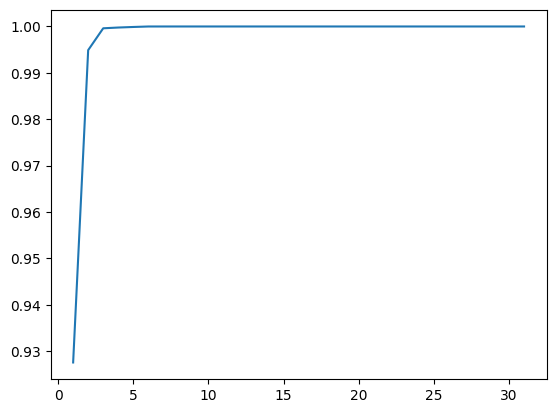

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n_comp_x = X.columns.nunique()
n_comp = [com for com in range(1,n_comp_x)]

for com in n_comp:
    pca = PCA(n_components=com).fit(X.T)
    cumsum = np.cumsum(pca.explained_variance_ratio_)
print(np.int64(pca.explained_variance_))
plt.plot(n_comp,cumsum)
plt.show()

2. We found that 7 components are suitable

In [16]:
pca = PCA(n_components=7).fit(X.T)
print(np.cumsum(pca.explained_variance_ratio_))
X_pca = pca.components_.T
res = sm.Logit(y,X_pca).fit()
print(res.summary())

[0.92757909 0.99490157 0.99960943 0.99977369 0.99989266]
Optimization terminated successfully.
         Current function value: 0.564764
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  699
Model:                          Logit   Df Residuals:                      694
Method:                           MLE   Df Model:                            4
Date:                Sat, 22 Apr 2023   Pseudo R-squ.:                 0.01256
Time:                        00:56:46   Log-Likelihood:                -394.77
converged:                       True   LL-Null:                       -399.79
Covariance Type:            nonrobust   LLR p-value:                   0.03974
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -11.4971      2.258     -5.091      0.

## Model training

We train numbers of simple models first without detailed hyper-parameter fine-tuning to gain a exploratory understanding about our data. We feed the models with the PCA-transformed data.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.25,random_state=42,shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True)
print(X_train.shape)
print(X_pca_train.shape)

(524, 32)
(524, 7)


### 1. KNN

0.7371428571428571 22


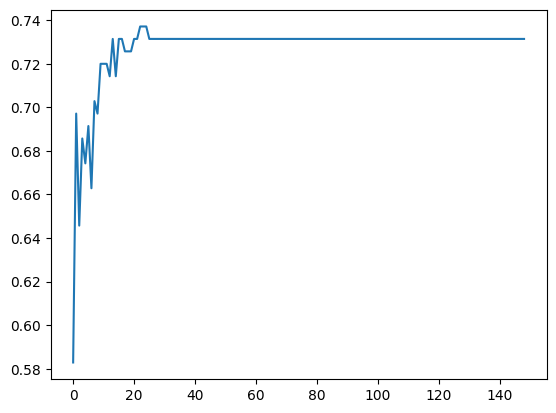

In [9]:
sc = []
for k in range(1,150):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_pca_train,y_train)
    sc.append(knn.score(X_pca_test,y_test))
print(np.max(sc),np.argmax(sc))
plt.plot(sc)

### 2. Random Forest

0.7371428571428571 61


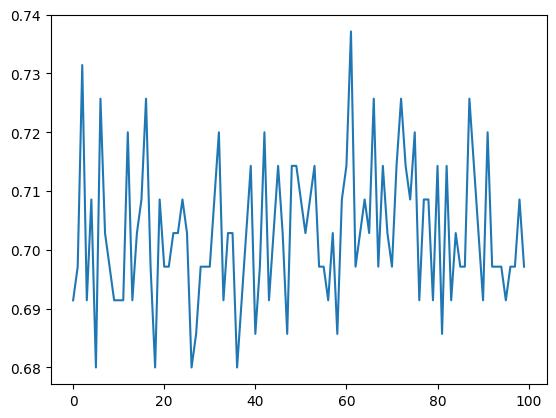

In [11]:
from sklearn.ensemble import RandomForestClassifier

sc = []
for k in range(100,200):
    rf = RandomForestClassifier(n_estimators=k)
    rf.fit(X_pca_train,y_train)
    sc.append(rf.score(X_pca_test,y_test))
print(np.max(sc),np.argmax(sc))
plt.plot(sc)

3. Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression


rf = LogisticRegression(max_iter=500)
rf.fit(X_pca_train,y_train)
print(rf.score(X_pca_test,y_test))

0.7314285714285714
